# Coordinates in observational astronomy









First, we’re going to investigate the area of the sky around the picturesque group of galaxies named “Hickson Compact Group 7,” download an image, and do something with its coordinates.

In [1]:
#Importing all the libraries that we need

from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np

In [2]:
# Set up matplotlib and use a nicer set of plot parameters
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

## Describing on-sky locations with coordinates


The SkyCoord class in the astropy.coordinates package is used to represent celestial coordinates. First, we’ll make a SkyCoord object based on our object’s name, “Hickson Compact Group 7” or “HCG 7” for short. Most astronomical object names can be found by SESAME, a service which queries Simbad, NED, and VizieR and returns the object’s type and its J2000 position. This service can be used via the SkyCoord.from_name() class method:

In [3]:
# initialize a SkyCood object named hcg7_center at the location of HCG 7
hcg7_center = SkyCoord.from_name('HCG 7')

In [4]:
#if you don't have an internet connection, run the following command
# hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')

In [5]:
type(hcg7_center)

astropy.coordinates.sky_coordinate.SkyCoord

In [6]:
print(hcg7_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88805556)>


In [7]:
#This is a directory. Let's checkout it's methods and attributes

dir(hcg7_center)

['T',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply',
 '_extra_frameattr_names',
 '_sky_coord_frame',
 'altaz',
 'apply_space_motion',
 'barycentrictrueecliptic',
 'cache',
 'cartesian',
 'cirs',
 'contained_by',
 'copy',
 'data',
 'dec',
 'default_differential',
 'default_representation',
 'diagonal',
 'differential_type',
 'directional_offset_by',
 'distance',
 'equinox',
 'fk4',
 'fk4noeterms',
 'fk5',
 'flatten',
 'frame',
 'frame_attributes',
 'frame_specific_representation_info',
 'from_name',
 'from_pixel',
 'galactic',
 'galacticlsr',
 'galactoc

In [8]:
print(hcg7_center.ra, hcg7_center.dec)
print(hcg7_center.ra.hour, hcg7_center.dec)


9d48m58.5s 0d53m17s
0.6544166666666668 0d53m17s


# Downloading an Image

Now that we have our object set at SkyCoord object, we can try to use it to access data from the Sloan Digitial Sky Survey (SDSS). Let’s start by trying to get a picture using the SDSS image cutout service to make sure HCG 7 is in the SDSS footprint and has good image quality.

In [9]:
# Python standard-library
from urllib.parse import urlencode
from urllib.request import urlretrieve

# tell the SDSS service how big of a cutout we want
im_size = 12*u.arcmin # get a 12 arcmin square
im_pixels = 1024
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=hcg7_center.ra.deg,
                              dec=hcg7_center.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
urlretrieve(url, 'HCG7_SDSS_cutout.jpg')

('HCG7_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x7f1be8fdf978>)

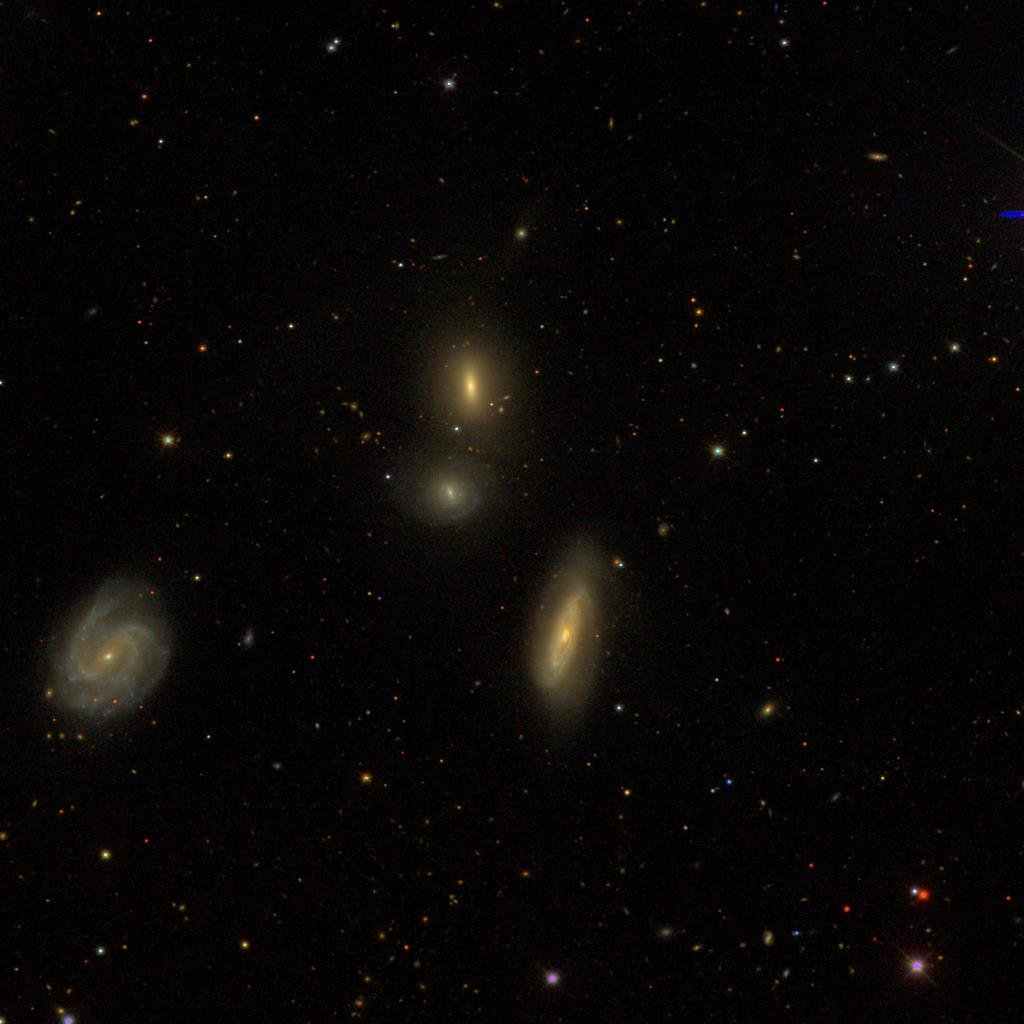

In [10]:
from IPython.display import Image
Image('HCG7_SDSS_cutout.jpg')

It's so pretty right! The center of it is the same RA and Dec value we entered above

In Astropy, the most common object you’ll work with for coordinates is SkyCoord. A SkyCoord can most easily be created directly from angles as shown below.

In this tutorial we’ll be converting between frames. Let’s start in the ICRS frame (which happens to be the default.)

For much of this tutorial we’ll work with the Hickson Compact Group 7. We can create an object either by passing the degrees explicitly (using the astropy units library) or by passing in strings. The two coordinates below are equivalent:

In [11]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')  # using degrees directly
print(hcg7_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>


In [12]:
hcg7_center = SkyCoord('0h39m15.9s', '0d53m17.016s', frame='icrs')  # passing in string format
print(hcg7_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>


In [13]:
#The RA and dec of the object can be accessed using the object hcg7_center

print(hcg7_center.ra)
print(hcg7_center.dec)

9d48m58.5s
0d53m17.016s


# Frame Transformations

astropy.coordinates provides many tools to transform between different coordinate systems. For instance, we can use it to transform from ICRS coordinates (in RA and Dec) to Galactic coordinates.

TThe key piece to understand is that all coordinates in Astropy are in particular “frames” and we can transform between a specific SkyCoord object in one frame to another. For example, we can transform our previously-defined center of HCG 7 from ICRS to Galactic coordinates:

In [14]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')


There are three different ways of transforming coordinates. Each has its pros and cons, but all should give you the same result. The first way to transform to other built-in frames is by specifying those attributes. For instance, let’s see the location of HCG 7 in Galactic coordinates.

In [15]:
hcg7_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

## Transforming coordinates using the transform_to() method and other coordinate object
The above is actually a special “quick-access” form that internally does the same as what’s in the cell below: it uses the `transform_to()

In [16]:
from astropy.coordinates import Galactic  # new coordinate baseclass
hcg7_center.transform_to(Galactic())

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

## Transforming coordinates using the transform_to() method and a string
Finally, we can transform using the transform_to() method and a string with the name of a built-in coordinate system.

In [17]:
hcg7_center.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

We can transform to many coordinate frames and equinoxes.

These coordinates are available by default:

ICRS

FK5

FK4

FK4NoETerms

Galactic

Galactocentric

Supergalactic

AltAz

GCRS

CIRS

ITRS

HCRS

PrecessedGeocentric

GeocentricTrueEcliptic

BarycentricTrueEcliptic

HeliocentricTrueEcliptic

SkyOffsetFrame

GalacticLSR

LSR

BaseEclipticFrame

BaseRADecFrame

Let’s focus on just a few of these. We can try FK5 coordinates next:

In [18]:
hcg7_center_fk5 = hcg7_center.transform_to('fk5')
print(hcg7_center_fk5)

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (9.81625645, 0.88806155)>


In [19]:
from astropy.coordinates import FK5
hcg7_center_fk5.transform_to(FK5(equinox='J1975'))  # precess to a different equinox


<SkyCoord (FK5: equinox=J1975.000): (ra, dec) in deg
    (9.49565759, 0.75084648)>

In [20]:
hcg7_center.galactic.ra  # should fail because Galactic coordinates are l/b not RA/Dec

AttributeError: 'SkyCoord' object has no attribute 'ra'

In [21]:
print(hcg7_center.galactic.l, hcg7_center.galactic.b)

116d28m32.0453s -61d49m51.581s


## Transform frames to get to altitude-azimuth (“AltAz”)
To actually do anything with observability we need to convert to a frame local to an on-earth observer. By far the most common choice is horizontal altitude-azimuth coordinates, or “AltAz”. We first need to specify both where and when we want to try to observe.

We’ll need to import a few more specific module

In [22]:
from astropy.coordinates import EarthLocation
from astropy.time import Time

In [23]:
EarthLocation.get_site_names()

['',
 '',
 '',
 'ALMA',
 'ATST',
 'Anglo-Australian Observatory',
 'Apache Point',
 'Apache Point Observatory',
 'Atacama Large Millimeter Array',
 'BAO',
 'BBSO',
 'Beijing XingLong Observatory',
 'Black Moshannon Observatory',
 'CHARA',
 'Canada-France-Hawaii Telescope',
 'Catalina Observatory',
 'Cerro Pachon',
 'Cerro Paranal',
 'Cerro Tololo',
 'Cerro Tololo Interamerican Observatory',
 'DCT',
 'DKIST',
 'Discovery Channel Telescope',
 'Dominion Astrophysical Observatory',
 'GBT',
 'Gemini South',
 'Green Bank Telescope',
 'Hale Telescope',
 'Haleakala Observatories',
 'Happy Jack',
 'IAO',
 'JCMT',
 'James Clerk Maxwell Telescope',
 'Jansky Very Large Array',
 'Keck Observatory',
 'Kitt Peak',
 'Kitt Peak National Observatory',
 'La Silla Observatory',
 'Large Binocular Telescope',
 'Las Campanas Observatory',
 'Lick Observatory',
 'Lowell Observatory',
 'MWA',
 'Manastash Ridge Observatory',
 'McDonald Observatory',
 'Medicina',
 'Medicina Dish',
 'Michigan-Dartmouth-MIT Observa

In [24]:
VBO = EarthLocation.of_site('Vainu Bappu Observatory')

Let’s check the altitude at 12:00 PM UTC

In [37]:
observing_time = Time('2010-12-21 12:00')


Now we use these to create an AltAz frame object. Note that this frame has some other information about the atmosphere, which can be used to correct for atmospheric refraction. Here we leave that alone, because the default is to ignore this effect (by setting the pressure to 0).

In [38]:
from astropy.coordinates import AltAz

aa = AltAz(location=VBO, obstime=observing_time)
print(aa)

<AltAz Frame (obstime=2010-12-21 12:00:00.000, location=(1206621.15671278, 6108765.3777786, 1379891.35439858) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>


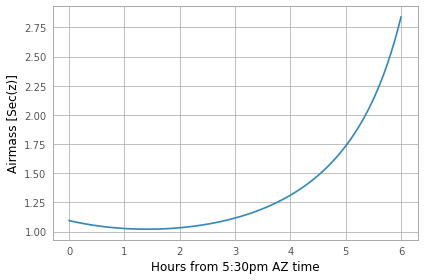

In [40]:


# this gives a Time object with an *array* of times
delta_hours = np.linspace(0, 6, 100)*u.hour
full_night_times = observing_time + delta_hours
full_night_aa_frames = AltAz(location=VBO, obstime=full_night_times)
full_night_aa_coos = hcg7_center.transform_to(full_night_aa_frames)

plt.plot(delta_hours, full_night_aa_coos.secz)
plt.xlabel('Hours from 5:30pm AZ time')
plt.ylabel('Airmass [Sec(z)]')
plt.tight_layout()

Great! Looks like the lowest airmass is in another hour and half or so (7 PM). But that might still be twilight… When should we start observing for proper dark skies? Fortunately, Astropy provides a get_sun function that can be used to check this. Let’s use it to check if we’re in 18-degree twilight or not.

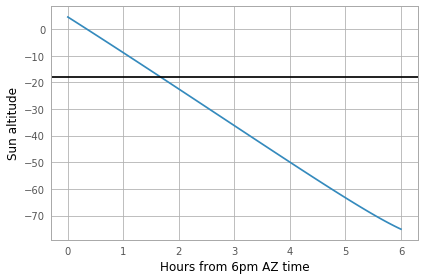

In [41]:
from astropy.coordinates import get_sun

full_night_sun_coos = get_sun(full_night_times).transform_to(full_night_aa_frames)
plt.plot(delta_hours, full_night_sun_coos.alt.deg)
plt.axhline(-18, color='k')
plt.xlabel('Hours from 6pm AZ time')
plt.ylabel('Sun altitude')
plt.tight_layout()
